### Basic Plotting

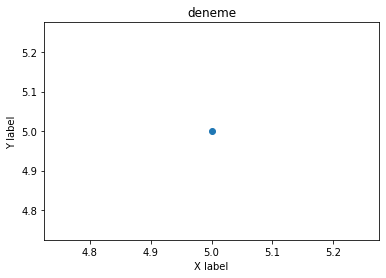

In [1]:
%matplotlib inline
#inline yerine notebook; görüntüye zoomlanabilir,detaylanabilir veya save edebilirsin.
import matplotlib.pyplot as plt

plt.plot(5,5,"o")
plt.title("deneme")
plt.xlabel("X label")
plt.ylabel("Y label")
plt.show()


### Load Dataset

<AxesSubplot:>

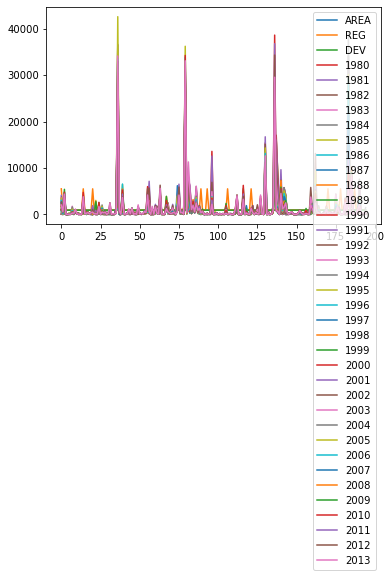

In [2]:
import numpy as np
import pandas as pd
df_can = pd.read_excel("Canada.xlsx",
                      sheet_name="Canada by Citizenship",
                      skiprows=range(20),
                      skipfooter =2)
df_canada = df_can.set_index("OdName")

df_can.plot(kind="line") #burda kind hist de olabilir data da değişebilir vs.

### Line Plots

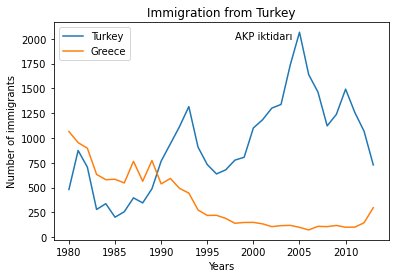

In [3]:
# Türkiye ve Yunanistan Canadaya göç trendi
years= list(range(1980,2014))

df_canada.loc["Turkey", years].plot(kind="line",label="Turkey") #Turkey olarak filtreler yılları row'a, valuelarını columna atar.
df_canada.loc["Greece", years].plot(kind="line",label = "Greece")
plt.title("Immigration from Turkey")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")
plt.legend(loc="upper left")
plt.text(1998,2000,"AKP iktidarı")
plt.show()

### Area Plots

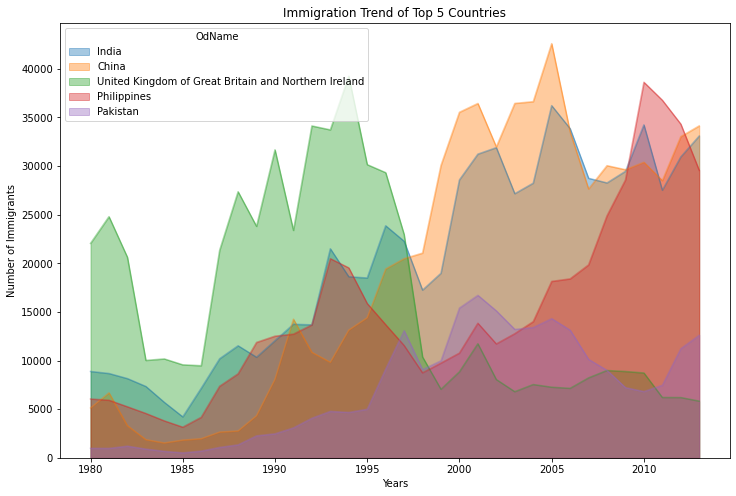

In [4]:
df_canada['Total']=df_canada.iloc[:,8:].sum(1)
df_canada.sort_values(["Total"], ascending=False,axis=0,inplace=True)
df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()

##En yüksek 5 göç veren ülkenin Area Plot'u
df_top5.plot(kind="area", stacked=False,figsize=(12,8), alpha=0.4) #alpha şeffaflık ayarlar
plt.title("Immigration Trend of Top 5 Countries")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.show()

### Histograms


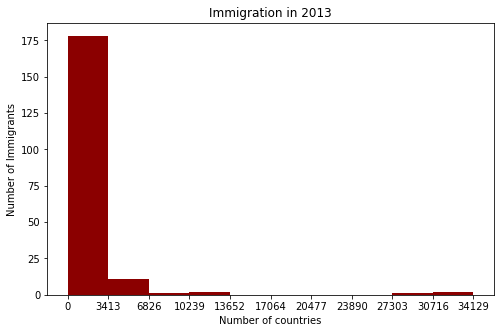

In [5]:
plt.figure(figsize=(8,5))
count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind="hist",color="darkred", xticks = bin_edges)
plt.title("Immigration in 2013")
plt.xlabel("Number of countries")
plt.ylabel("Number of Immigrants")
plt.show()

### Bar Chart

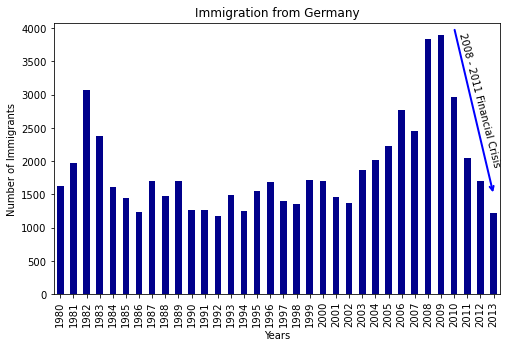

In [6]:
## ALmanyada Kanadaya göçe bakacaz.
plt.figure(figsize=(8,5))
df_canada.loc["Germany",years].plot(kind="bar",color="darkblue")
plt.title("Immigration from Germany")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(33, 1500),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(30, 4000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(30.2, 1900),                    # start the text at at point (year 2008 , pop 30)
             rotation=-75.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.show()

### Pie Chart

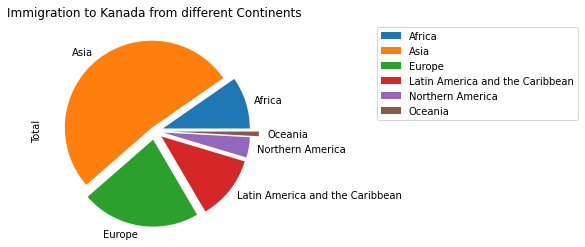

In [7]:
years.append("Total")
df_continents = df_canada.groupby("AreaName", axis=0)[years].sum()


df_continents["Total"].plot(kind="pie", explode = (0.1,0.05,0.1,0.1,0.1,0.2)) #explode ayırıyor dilimleri
plt.title("Immigration to Kanada from different Continents")
plt.legend(df_continents.index, loc="upper left", bbox_to_anchor=(1.5, 1)) ##bbox_to_ancher plotun dışına çıkartıyor
plt.show()


### Box Plots

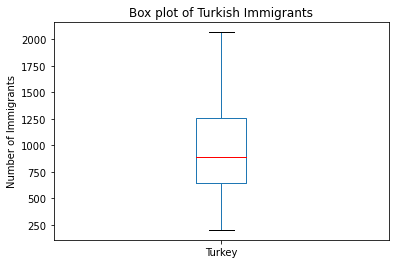

In [10]:
years.remove("Total")
df_tr = df_canada.loc[["Turkey"],years].transpose()

df_tr.plot(kind="box", medianprops=dict(linestyle='-', linewidth=1, color='red'))
plt.title("Box plot of Turkish Immigrants")
plt.ylabel("Number of Immigrants")
plt.show()

### Scatter Plots

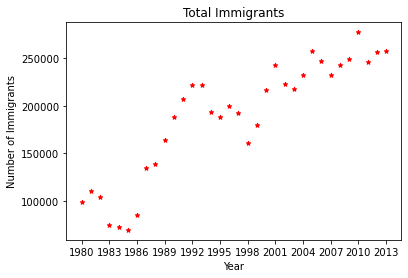

In [11]:
df_total = pd.DataFrame(df_can[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.rename(columns={0: "Total"}, inplace=True)
df_total.index.name = "Year"
df_total.reset_index(inplace=True)

df_total.plot(kind="scatter", y="Total", x="Year", marker = "*", color ="red")
plt.title("Total Immigrants")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.xticks(np.arange(1980,2015,3))
plt.show()


### Word Clouds

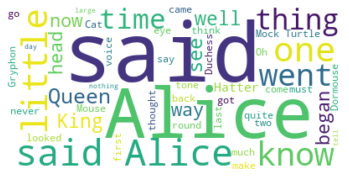

In [32]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
alice_novel = open('alice_novel.txt', 'r').read()
stopwords = set(STOPWORDS)
alice_wc = WordCloud(
    background_color='white',
    max_words=50,
    stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off') #on olursa eksenler gözükür, saçma
plt.show()

### Seaborn Regression Plot

C:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


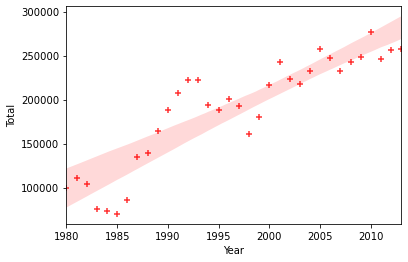

In [36]:
import seaborn as sns
ax= sns.regplot(x="Year",y="Total",data=df_total, color="red", marker ="+")

### Folium

In [54]:
#!pip install folium
import folium
world_map = folium.Map()
world_map

## Göksu Parkı
goksu = folium.Map(
    location = [39.98792, 32.64472],
    zoom_start = 15,
    tiles = "Stamen Terrain") #Tiles değiştirilerek farklı tipte mapler oluşturabilir
goksu

In [88]:
## MAPS WITH MARKERS
goksu = folium.Map(
    location = [39.98792, 32.64472],
    zoom_start = 15,
    tiles = "Stamen Terrain")
susuzgolu = folium.map.FeatureGroup()
susuzgolu.add_child(folium.features.CircleMarker(
        [39.991, 32.64792], radius=70,
        color="red")) ## yuvarlak ekliyoruz
goksu.add_child(susuzgolu)
folium.Marker([39.991, 32.64792], popup="Susuz Gölü").add_to(susuzgolu) #label ekledik
goksu

In [132]:
### Choropleth Maph (tematik harita istatistiksel değerlere göre, nüfus vs)

world_map = folium.Map(location=[0, 0], zoom_start=2)
world_geo = r"world_countries.json"

world_map.choropleth(
    geo_data=world_geo,
    data=df_canada,
    columns=['OdName', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
world_map